# Neural Network for classifying MNIST Fashion Dataset

In [100]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import torch

import numpy as np

import matplotlib.pyplot as plt

from torchvision import datasets, transforms

from torch import nn 

from torch import optim

In [67]:
#this is to normalize each pixel with mean = 0.5 and std deviation=0.5 and convert it to a tensor.
tansform  = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5)),])

#Download the MNIST Data set
trainset = datasets.FashionMNIST('MNIST_Fashion_Data/',download = True,train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting MNIST_Fashion_Data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_Fashion_Data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting MNIST_Fashion_Data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_Fashion_Data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting MNIST_Fashion_Data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_Fashion_Data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting MNIST_Fashion_Data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_Fashion_Data/FashionMNIST/raw



In [122]:
dataiter = iter(trainloader)
images,labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


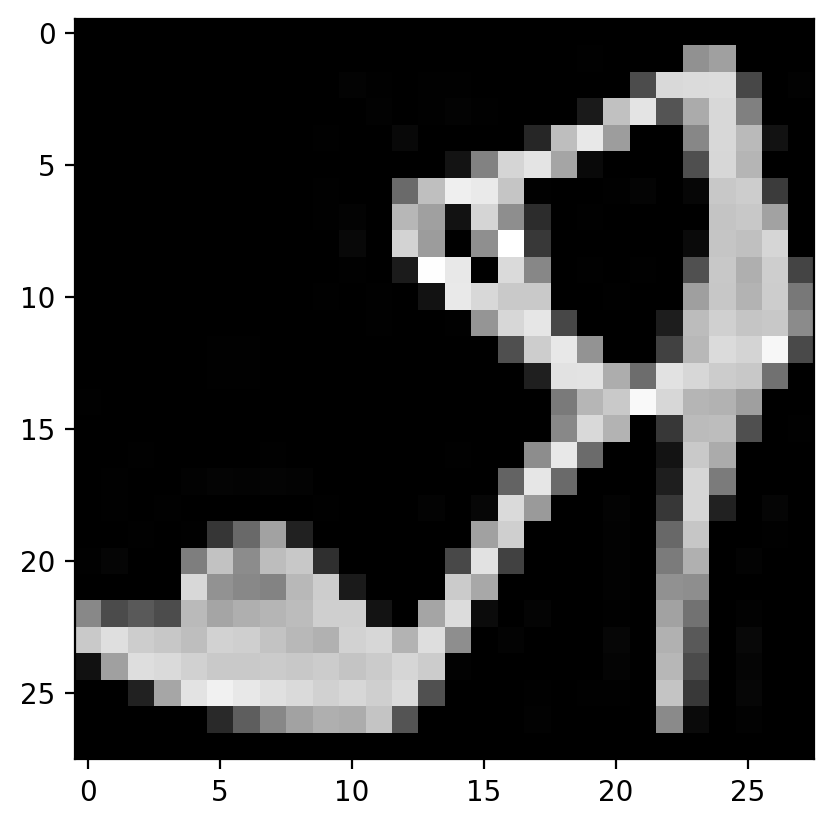

In [123]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

In [88]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()

#model.parameters means the weights in the NN.
optimizer = optim.SGD(model.parameters(),lr = 0.003)

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images,labels in trainloader:
        #Flatten MNIST images into 784 long vector
        images = images.view(images.shape[0],-1)
        
        optimizer.zero_grad()

        #forward pass
        logits = model(images)

        #calculate loss with the logits and the labels
        loss = criterion(logits,labels)
        
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        
        #subtract the gradients from the weights(parameters)
        optimizer.step()
        running_loss +=loss.item()
    else:
        print(f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 1.6150008525802637
Training Loss: 0.8088817679678707
Training Loss: 0.6605072692195489
Training Loss: 0.5992354435135306
Training Loss: 0.5585228286064001


In [72]:
def view_classify(img, ps, version="Fashion"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [84]:
testset = datasets.FashionMNIST('MNIST_Fashion_Data_test/',download = True,train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset,batch_size=64,shuffle=True)

<class 'torch.Tensor'>
torch.Size([64, 784])
torch.Size([64])


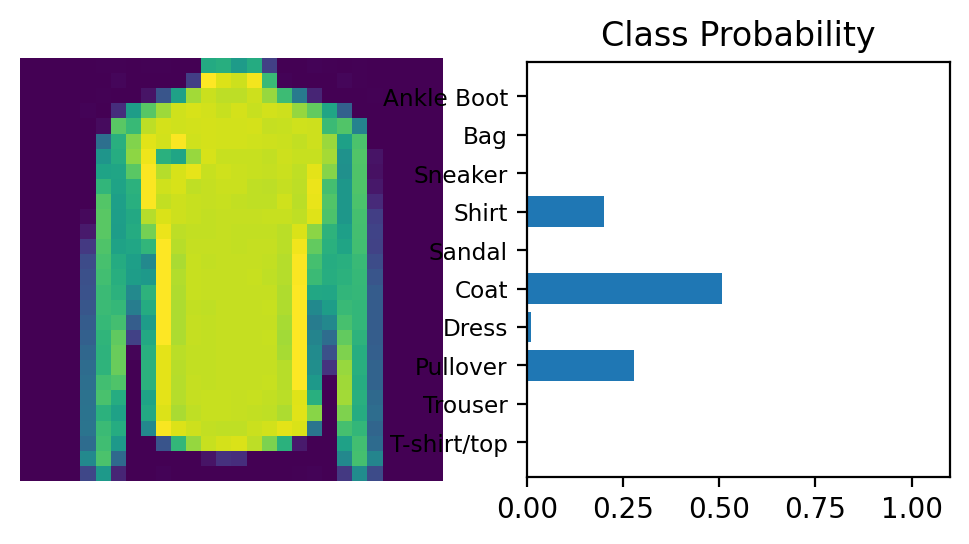

In [132]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.view(images.shape[0],-1)
print(type(images))
print(images.shape)
print(labels.shape)

#plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r')

#class probabilities
ps = torch.exp(model(images))

#ps contains probabilities for all 64 images in the batch.
ps.shape

#print the 2nd ps and image
view_classify(images[1],ps[1])